<a href="https://colab.research.google.com/github/felipenabica/Portfolio/blob/main/Analisando_os_Dados_de_Roma_Italia_no_airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Roma - Itália.*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Roma - Itália, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/italy/lazio/rome/2023-09-07/visualisations/listings.csv",)

## Análise dos Dados


**Dicionário das variáveis**

* **0   id** - *codigo de identificacao do imovel*
* **1  name** - *nome do imovel no anuncio*
* **2   host_id** - *codigo de identificacao do proprietario do imovel*
* **3   host_name** - *nome do proprietario*
* **4   neighbourhood_group** - *valores ausentes*
* **5   neighbourhood** - *bairro do imovel*
* **6   latitude** - *coordenada de latitude do imovel*
* **7   longitude** - *coordenada de longitude do imovel*
* **8   room_type** - *tipo de imovel alugado*
* **9   price** - *valor da locação*
* **10  minimum_nights** - *noites minimas para locação*
* **11  number_of_reviews** - *numero de avaliacoes*
* **12  last_review** - *ultima avaliação*
* **13  reviews_per_month** - *quantidade de avaliacoes por mes*
* **14  calculated_host_listings_count** - *quantidade de imoveis anunciados pelo mesmo proprietario*
* **15  availability_365** - *disponibilidade*
* **16  number_of_reviews_ltm** - *valores ausentes*
* **17  license** - *valores ausentes*


In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2737,Place to stay in Rome · ★4.80 · 1 bedroom · 1 ...,3047,Elif,NaN,VIII Appia Antica,41.871360,12.482150,Private room,75,7,7,2015-05-28,0.07,6,358,0,NaN
1,3079,Rental unit in Rome · ★4.53 · 1 bedroom · 1 be...,3504,Laura,NaN,I Centro Storico,41.895000,12.491170,Entire home/apt,90,20,21,2022-04-30,0.14,6,130,0,NaN
2,11834,Rental unit in Rome · ★4.81 · 1 bedroom · 1 be...,44552,Serena,NaN,I Centro Storico,41.895447,12.491181,Entire home/apt,105,2,203,2023-08-06,1.35,1,310,46,NaN
3,103245,Rental unit in Rome · ★4.87 · 2 bedrooms · 4 b...,538724,Carla,NaN,I Centro Storico,41.887880,12.469750,Entire home/apt,110,2,389,2023-09-05,2.60,1,266,77,NaN
4,12398,Rental unit in Rome · ★4.91 · 2 bedrooms · 3 b...,11756,Gea,NaN,II Parioli/Nomentano,41.925820,12.469280,Entire home/apt,121,1,59,2023-08-15,0.38,1,303,15,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [5]:
# identificar o volume de dados do DataFrame
# verificar as 5 primeiras entradas do dataset
display(df.head())
print("\n " .format())
print("O DataFrame possui {} entradas" .format(df.shape[0]), "e {} variaveis." .format(df.shape[1]))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2737,Place to stay in Rome · ★4.80 · 1 bedroom · 1 ...,3047,Elif,NaN,VIII Appia Antica,41.871360,12.482150,Private room,75,7,7,2015-05-28,0.07,6,358,0,NaN
1,3079,Rental unit in Rome · ★4.53 · 1 bedroom · 1 be...,3504,Laura,NaN,I Centro Storico,41.895000,12.491170,Entire home/apt,90,20,21,2022-04-30,0.14,6,130,0,NaN
2,11834,Rental unit in Rome · ★4.81 · 1 bedroom · 1 be...,44552,Serena,NaN,I Centro Storico,41.895447,12.491181,Entire home/apt,105,2,203,2023-08-06,1.35,1,310,46,NaN
3,103245,Rental unit in Rome · ★4.87 · 2 bedrooms · 4 b...,538724,Carla,NaN,I Centro Storico,41.887880,12.469750,Entire home/apt,110,2,389,2023-09-05,2.60,1,266,77,NaN
4,12398,Rental unit in Rome · ★4.91 · 2 bedrooms · 3 b...,11756,Gea,NaN,II Parioli/Nomentano,41.925820,12.469280,Entire home/apt,121,1,59,2023-08-15,0.38,1,303,15,NaN



 
O DataFrame possui 28014 entradas e 18 variaveis.


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

dfporcentagem = (df.isnull().sum() / df.shape[0]).sort_values(ascending=False)
dfporcentagem

neighbourhood_group               1.000000
license                           0.813700
reviews_per_month                 0.139537
last_review                       0.139537
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

In [7]:
dflicence = (df.license.isnull().sum() / df.shape[0])
dfng = (df.neighbourhood_group.isnull().sum() / df.shape[0])
dfrpm = (df.reviews_per_month.isnull().sum() / df.shape[0])
dflr = (df.last_review.isnull().sum() / df.shape[0])

print("O valor de entradas ausentes para a variavel 'License' é: {}\n" .format(dflicence))
print("O valor de entradas ausentes para a variavel 'Neighbourhood_group' é: {}\n" .format(dfng))
print("O valor de entradas ausentes para a variavel 'Reviews_per_month' é: {}\n" .format(dfrpm))
print("O valor de entradas ausentes para a variavel 'Last_Review' é: {}\n" .format(dflr))

O valor de entradas ausentes para a variavel 'License' é: 0.8137002927107875

O valor de entradas ausentes para a variavel 'Neighbourhood_group' é: 1.0

O valor de entradas ausentes para a variavel 'Reviews_per_month' é: 0.13953737417005782

O valor de entradas ausentes para a variavel 'Last_Review' é: 0.13953737417005782



### **Q3. Qual o tipo de distribuição das variáveis?**

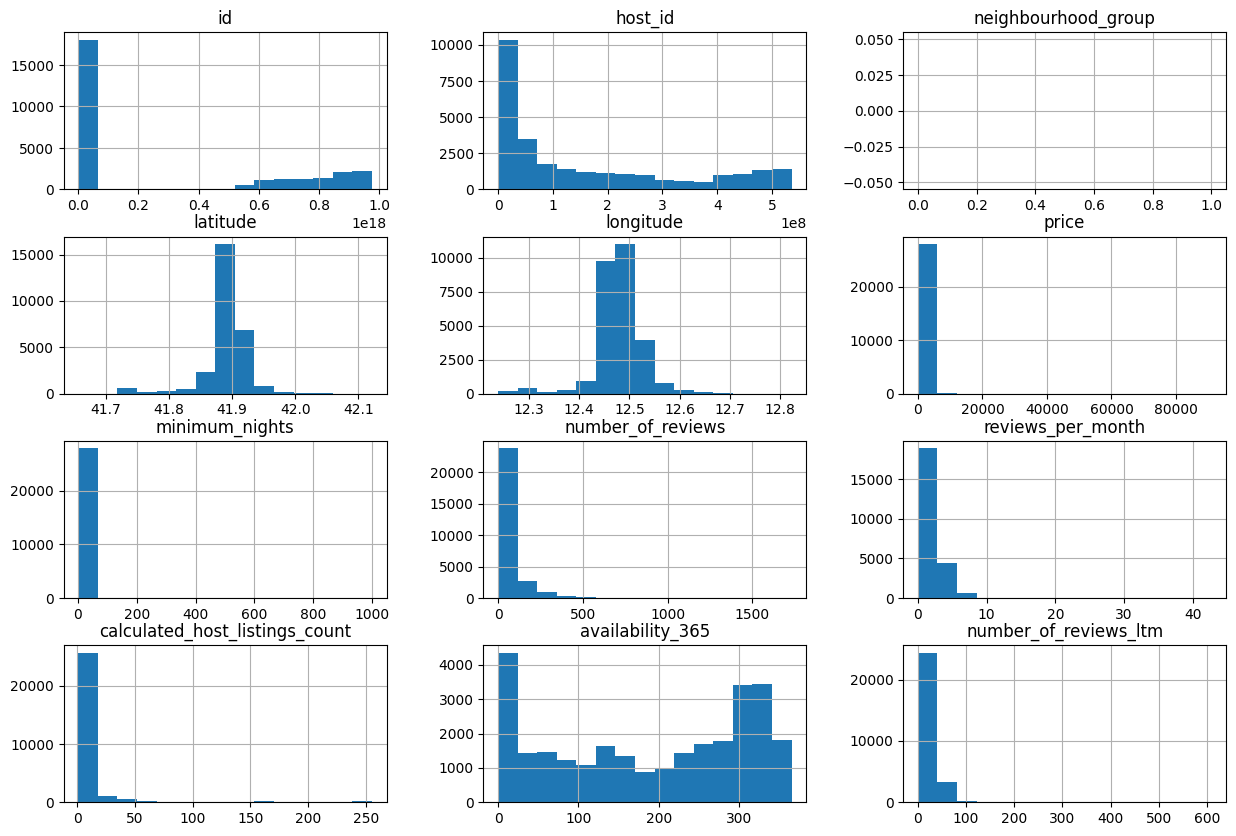

In [8]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

In [9]:
# ver a média da coluna `price``
df.price.describe()

count    28014.000000
mean       207.733312
std        757.047129
min          8.000000
25%         89.000000
50%        135.000000
75%        207.000000
max      90963.000000
Name: price, dtype: float64

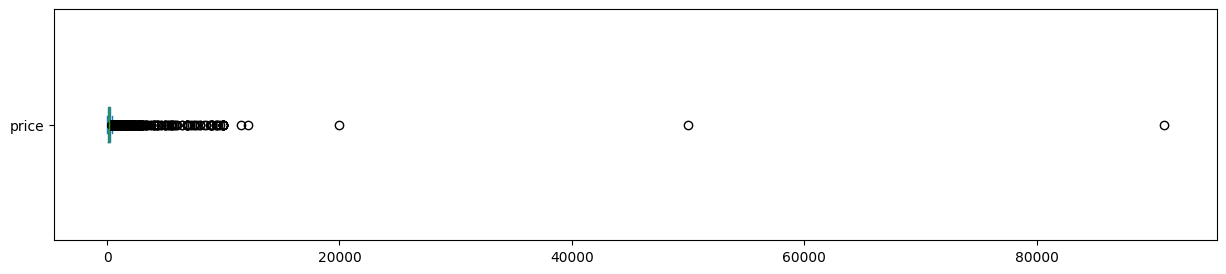

In [10]:
df.price.plot(kind='box', vert=False, figsize=(15,3),)
plt.show()

count    27906.000000
mean       181.024439
std        181.544394
min          8.000000
25%         89.000000
50%        135.000000
75%        206.000000
max       2500.000000
Name: price, dtype: float64

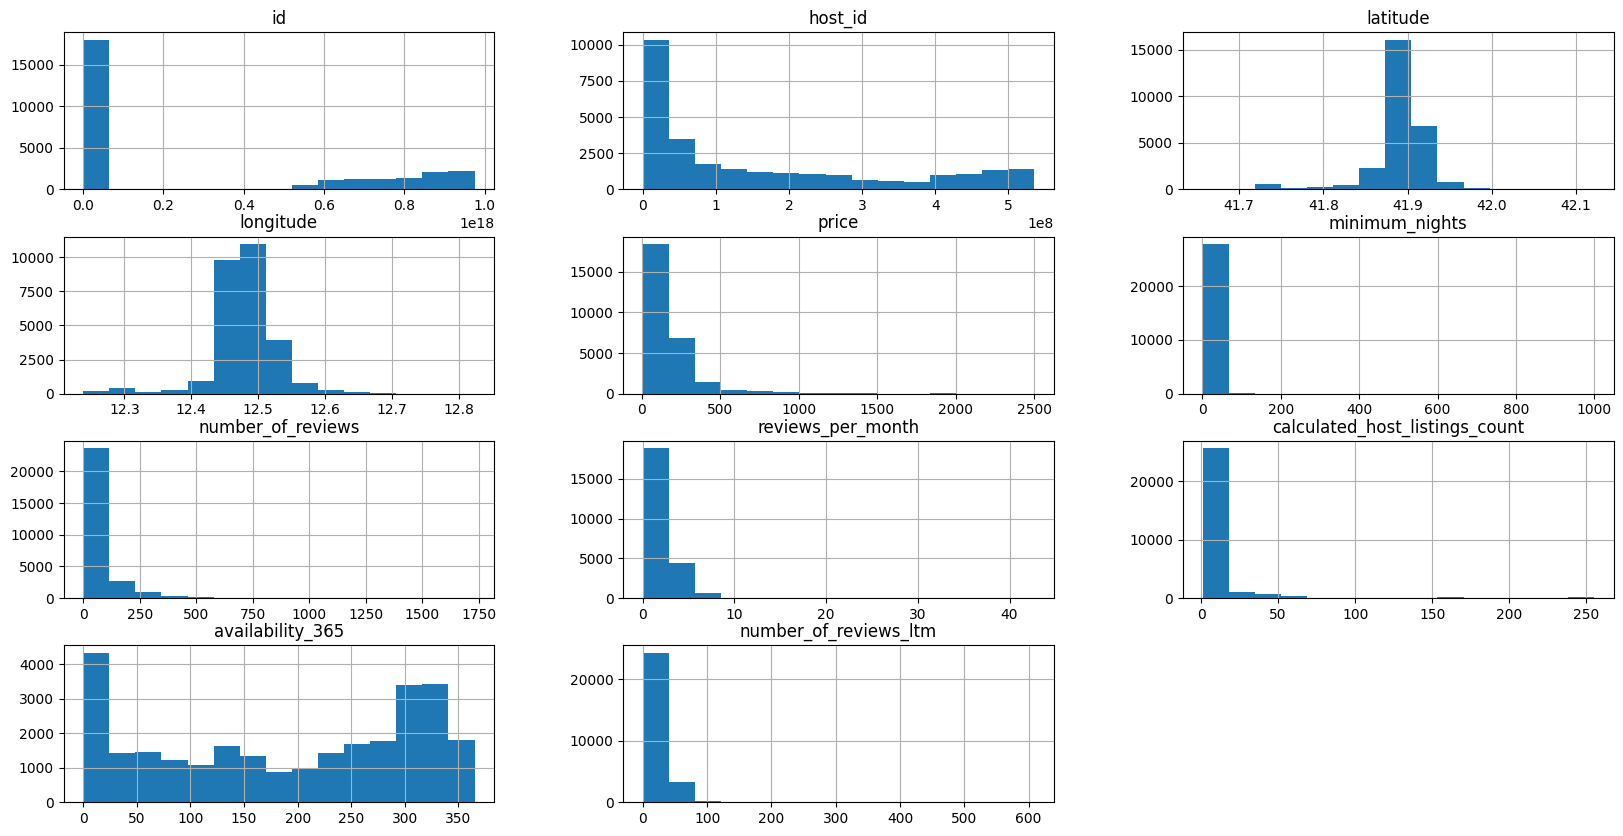

In [11]:
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 2500].index, axis=0, inplace=True)
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

df_clean.hist(bins=15, figsize=(20,10));
df_clean.price.describe()

### **Q4. Qual a correlação existente entre as variáveis**

In [12]:
# criar uma matriz de correlação
correlacao = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(correlacao)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.024621,-0.057737,-0.059382,0.126912,0.119100
minimum_nights,-0.024621,1.000000,-0.024580,-0.053720,-0.019464,-0.013897
number_of_reviews,-0.057737,-0.024580,1.000000,0.453400,-0.028008,0.018863
reviews_per_month,-0.059382,-0.053720,0.453400,1.000000,-0.010644,0.089592
calculated_host_listings_count,0.126912,-0.019464,-0.028008,-0.010644,1.000000,-0.077808
availability_365,0.119100,-0.013897,0.018863,0.089592,-0.077808,1.000000


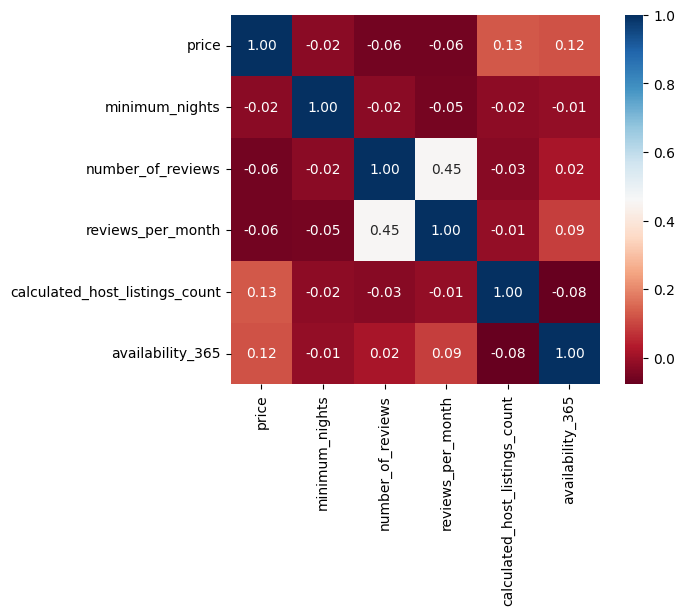

In [31]:
# plotar um heatmap a partir das correlações
sns.heatmap(correlacao, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Analisando este heatmap podemos ver que a maior correlação entre as váriaveis são "Number_of_reviews" e "Reviews_per_month". A segunda correlação por menos significativa que seja mostra que o valor da locação "PRICE" é afetada pela quantidade de imóveis que o locatário possuí "calculated_host_listing_count" e pela disponibilidade de locação do imóvel durante o ano "availability_365"

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [14]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    19547
Private room        7592
Hotel room           615
Shared room          152
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.700459
Private room       0.272056
Hotel room         0.022038
Shared room        0.005447
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [19]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean() .sort_values(ascending=False)[:18]

neighbourhood
I Centro Storico              227.235689
XIII Aurelia                  156.435398
II Parioli/Nomentano          152.846902
IX Eur                        147.564841
XV Cassia/Flaminia            137.097917
XII Monte Verde               134.745942
VIII Appia Antica             129.303145
VII San Giovanni/Cinecittà    123.045761
XIV Monte Mario               121.364261
III Monte Sacro               117.868817
X Ostia/Acilia                109.107635
IV Tiburtina                  100.123288
XI Arvalia/Portuense           99.730539
VI Roma delle Torri            90.098765
V Prenestino/Centocelle        87.758983
Name: price, dtype: float64

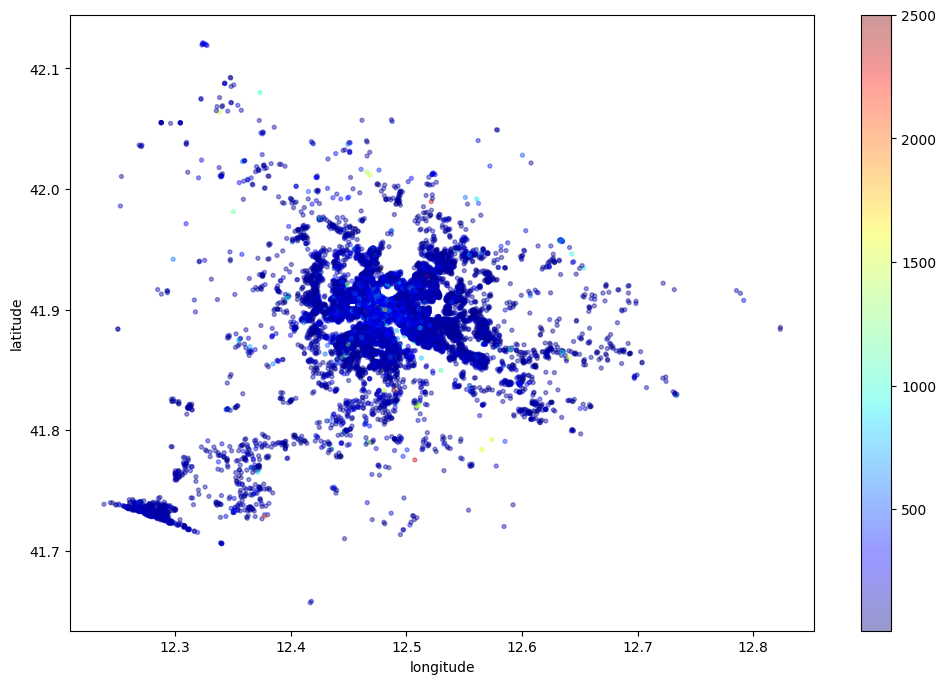

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean['minimum_nights'].mean()

3.2937002795097827

#Conclusão

>Podemos ver nesta análise exploratoria dos dados do AirBNB de Roma - Itália, que o arquivo de dados possui 28014 entradas e 18 variaveis. Destas 18 variaveis apenas quatro possuiam valores ausentes, sendo elas: "neighbourhood_group" com 100% de valores ausentes, "license" com 81,37% de valores ausentes, "reviews_per_month" com 13,95% de valores ausentes, "last_review" com 13,95% de valores ausentes.

>A média dos imóveis disponiveis para locação no AirBnB de Roma - Itália é de EU $181,02 . E existe uma pequena correlação entre as variaveis "Price", "Calculated_host_listings_count" e "avaliability_365", que a grosso modo, mesmo sem uma investigação mais aprofundada nos leva a crer que o valor do imóvel é "influenciado" pela quantidade de imóveis que o locatário possui e pela disponibilidade do imóvel durante o ano.
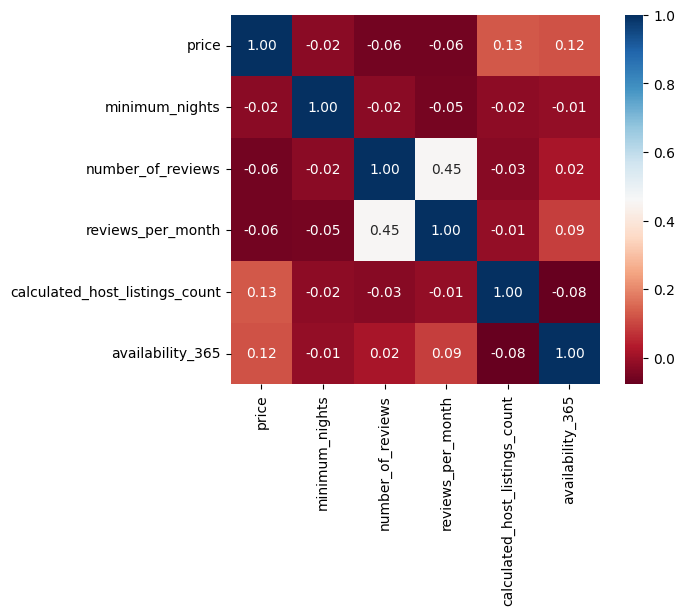

>O AirBnB de Roma possui 04 tipos de locação disponiveis: "Entire home/apt", "Private room", "Hotel room" e "Shared room". Sendo "Entire home/apt" o tipo de locação mais procurada com 70% de todos os imóveis disponiveis e a menos procurada sendo "Shared room" com apenas 0,05%.
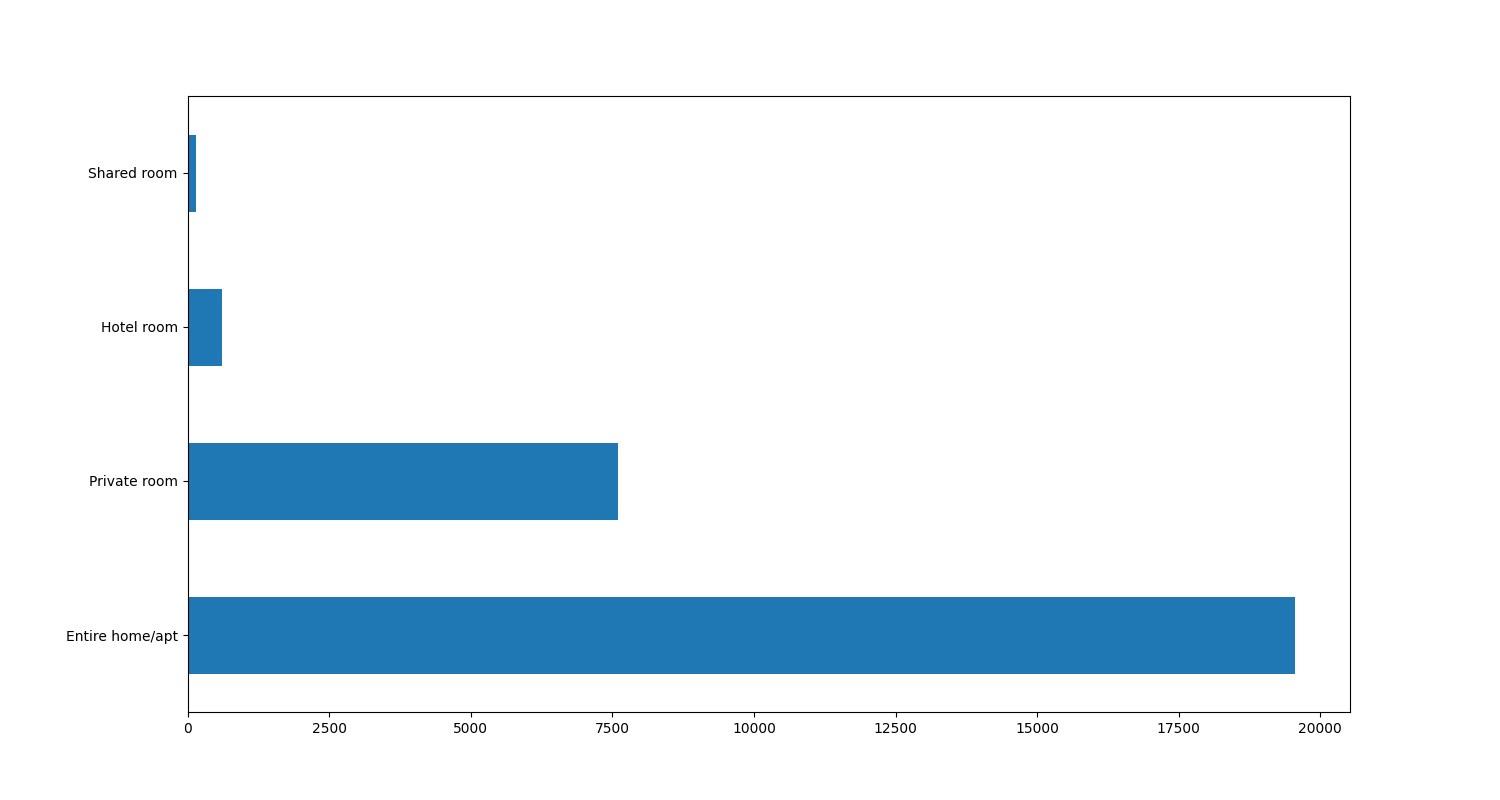

>Conseguimos chegar a conclusão pelo calculo da média dos imóveis por bairros de que a localidade mais cara para locação em Roma é o "Centro Storico" com um valor médio de EU 227,23 e a localidade com valor médio mais baixo é Prenestino/Centocelle com uma média de EU 87,75.
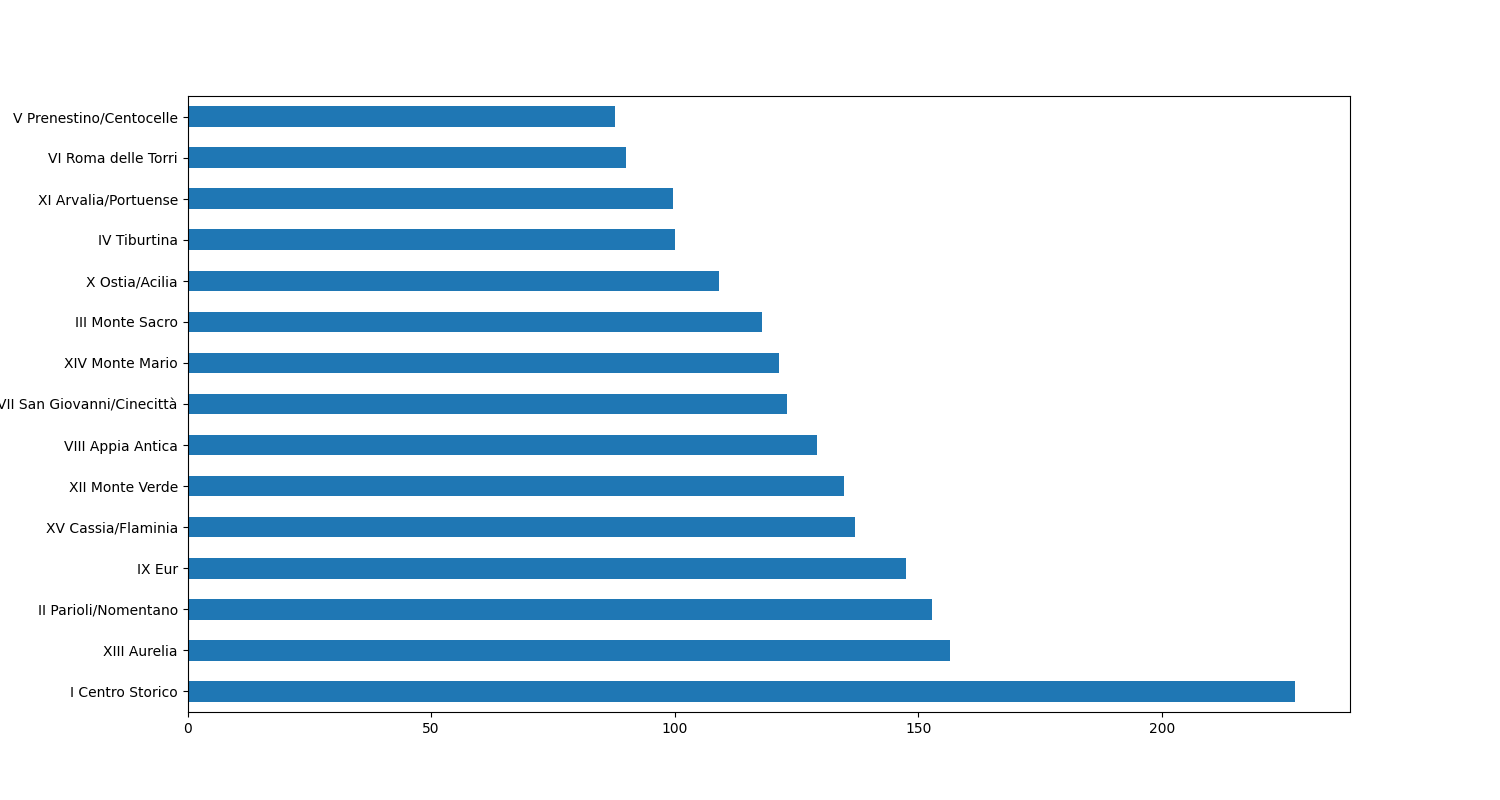

>E se você estiver planejando ir visitar Roma, saiba que a media para o minimo de noites que você pode alugar uma acomodação no AirBnb é de 3 noites.